In [24]:
using Revise
using Pkg; Pkg.activate("/Users/deszoeks/Projects/ASTRAL/lidar")

using Dates
using PyPlot
using NCDatasets

pd = permutedims

  Activating project at `~/Projects/ASTRAL/lidar`


permutedims (generic function with 17 methods)

In [65]:
"hour coordinate from datetime t"
hr(t) = hour(t) + minute(t)/60

"2-panel u,v plots from lidar"
function plot_uv_lidar(t,z, u,v)
    yyyymmdd = Dates.format(Date(t[1]), dateformat"yyyy-mm-dd")
    
    subplot(2,1,1)
    pcolormesh(hr.(t), z/1e3, pd(u), cmap="RdYlBu_r", vmin=-15, vmax=15)
    colorbar()
    ylim([0, 1.200])
    ylabel("height (km)")
    title("relative wind $(yyyymmdd)\nu (m/s)")
    
    subplot(2,1,2)
    pcolormesh(hr.(t), z/1e3, pd(v), cmap="RdYlBu_r", vmin=-15, vmax=15)
    colorbar()
    ylim([0, 1.200])
    ylabel("height (km)")
    xlabel("hour")
    title("v (m/s)")
    
    tight_layout()
end

plot_uv_lidar

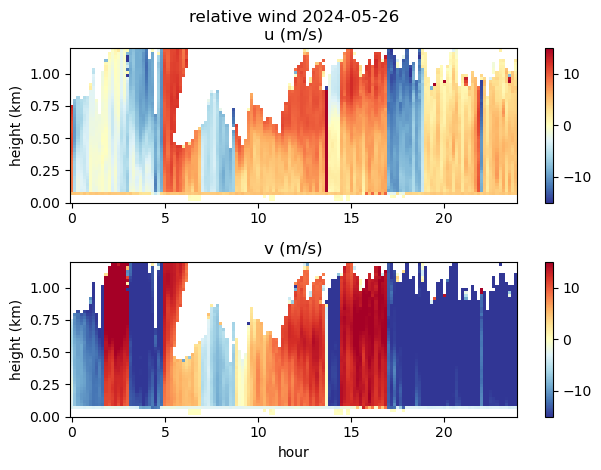

In [67]:
datadir = "./data/lidar/netcdf/"
readdir(datadir) # daily lidar_uv nc data files from Jayesh

aaa = filter(s->occursin(r"^ekamsat_lidar_uv_\d{8}.nc$",s), readdir(datadir))
# plot all daily lidar_uv nc data files from Jayesh
for file in [aaa[8]]
    ds = Dataset(joinpath(datadir,file))
    z_range = ds["z_range"][:]
    time_urel = ds["time"][:]
    urel = ds["ur"][:,:]
    vrel = ds["vr"][:,:]
    yyyymmdd = Dates.format(Date(time_urel[1]), dateformat"yyyy-mm-dd")
    
    clf()
    plot_uv_lidar(time_urel,z_range, urel,vrel)
    savefig(joinpath(datadir, "uvrel_$(yyyymmdd).png"))
end

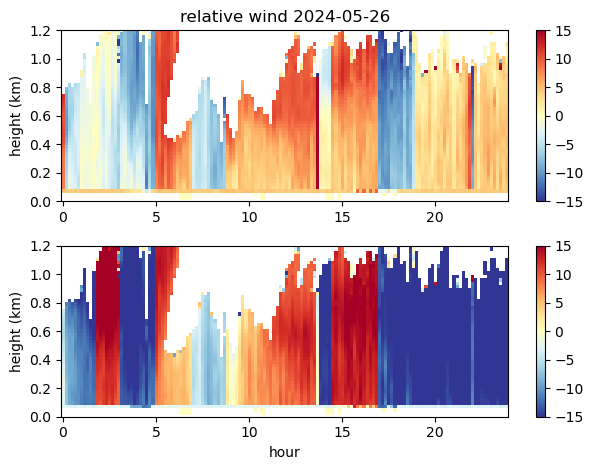

In [62]:
# plot one day

ds = Dataset(joinpath(datadir,"ekamsat_lidar_uv_20240526.nc"))
z_range = ds["z_range"][:]
time_urel = ds["time"][:]
urel = ds["ur"][:,:]
vrel = ds["vr"][:,:]

yyyymmdd = Dates.format(Date(time_urel[1]), dateformat"yyyy-mm-dd")
hr(t) = hour(t) + minute(t)/60

subplot(2,1,1)
pcolormesh(hr.(time_urel), z_range/1e3, pd(urel), cmap="RdYlBu_r", vmin=-15, vmax=15)
colorbar()
ylim([0, 1.200])
ylabel("height (km)")
title("relative wind $(yyyymmdd)")

subplot(2,1,2)
pcolormesh(hr.(time_urel), z_range/1e3, pd(vrel), cmap="RdYlBu_r", vmin=-15, vmax=15)
colorbar()
ylim([0, 1.200])
ylabel("height (km)")
xlabel("hour")

tight_layout()


In [60]:
time_urel

144-element Vector{DateTime}:
 2024-01-01T00:00:00
 2024-01-01T00:00:00
 2024-01-01T00:00:00
 2024-01-01T00:00:00
 2024-01-01T00:00:00
 2024-01-01T00:00:00
 2024-01-01T00:00:00
 2024-01-01T00:00:00
 2024-01-01T00:00:00
 2024-01-01T00:00:00
 2024-01-01T00:00:00
 2024-01-01T00:00:00
 2024-01-01T00:00:00
 ⋮
 2024-01-01T00:00:00
 2024-01-01T00:00:00
 2024-01-01T00:00:00
 2024-01-01T00:00:00
 2024-01-01T00:00:00
 2024-01-01T00:00:00
 2024-01-01T00:00:00
 2024-01-01T00:00:00
 2024-01-01T00:00:00
 2024-01-01T00:00:00
 2024-01-01T00:00:00
 2024-01-01T00:00:00